<a href="https://colab.research.google.com/github/WRMELO/projeto-rl/blob/main/preparacao_de_dados_rl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Monte seu Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git clone https://github.com/WRMELO/projeto-rl /content/drive/MyDrive/rl

Cloning into '/content/drive/MyDrive/rl'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 75 (delta 29), reused 62 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (75/75), 868.47 KiB | 8.12 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [9]:
# 📘 4.1 Fontes dos Dados

"""
Coleta dos dados históricos dos ativos VALE3, PETR4 e BRFS3 usando a biblioteca `yfinance`,
com período de 5 anos e frequência diária. Os arquivos são salvos no Google Drive na pasta
'Meu Drive/rl/dados', em formato CSV.
"""

import yfinance as yf
import pandas as pd
import os

# Diretório no Google Drive
output_dir = "/content/drive/MyDrive/rl/dados"
os.makedirs(output_dir, exist_ok=True)

# Lista de ativos e período
tickers = ['VALE3.SA', 'PETR4.SA', 'BRFS3.SA']
period = '5y'

# Coleta e salvamento
for ticker in tickers:
    df = yf.download(ticker, period=period, interval='1d')
    nome = ticker.replace(",", "").replace(".SA", "").lower()
    caminho = os.path.join(output_dir, f"dados_{nome}.csv")
    df.to_csv(caminho)
    print(f"✅ Dados de {ticker} salvos em: {caminho}")

# Visualização inicial
df.head()


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VALE3.SA']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


✅ Dados de VALE3.SA salvos em: /content/drive/MyDrive/rl/dados/dados_vale3.csv


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PETR4.SA']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


✅ Dados de PETR4.SA salvos em: /content/drive/MyDrive/rl/dados/dados_petr4.csv


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRFS3.SA']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


✅ Dados de BRFS3.SA salvos em: /content/drive/MyDrive/rl/dados/dados_brfs3.csv


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BRFS3.SA,BRFS3.SA,BRFS3.SA,BRFS3.SA,BRFS3.SA,BRFS3.SA
Date,,,,,,


## 📘 4.2 – Leitura dos Ativos e Benchmarks

O projeto utiliza três ações principais (**VALE3**, **PETR4**, **BRFS3**) e dois ETFs de referência para benchmarking:

- **BOVA11**: benchmark do Ibovespa (renda variável);
- **IMAB11**: benchmark da renda fixa (títulos do Tesouro IPCA+).

Os arquivos `.csv` apresentam múltiplas linhas de cabeçalho inválidas.  
Para garantir a leitura correta:

- Ignoramos as 3 primeiras linhas (`header=3`);
- Atribuímos manualmente os nomes das colunas;
- Padronizamos o processo em loop.

Abaixo, os dados são carregados e validados com `head()`.


In [10]:
import pandas as pd

# Caminho base e tickers
caminho_base = "/content/drive/MyDrive/rl/dados"
lista_tickers = ["vale3", "petr4", "brfs3", "bova11", "imab11"]
colunas = ["Date", "Close", "High", "Low", "Open", "Volume"]

dfs = {}

# Leitura com verificação de integridade
for ticker in lista_tickers:
    caminho = f"{caminho_base}/dados_{ticker}.csv"

    # Verifica número de linhas antes de tentar ler com header=3
    with open(caminho, "r", encoding="utf-8") as f:
        linhas = f.readlines()

    if len(linhas) < 4:
        print(f"❌ {ticker.upper()} — Arquivo com menos de 4 linhas. Verifique o conteúdo.")
        continue

    # Lê a partir da linha 4
    df = pd.read_csv(caminho, header=3, names=colunas, parse_dates=["Date"])
    dfs[ticker.upper()] = df
    print(f"\n📈 {ticker.upper()} — {df.shape[0]} linhas x {df.shape[1]} colunas")
    display(df.head(3))



📈 VALE3 — 1243 linhas x 6 colunas


,Date,Close,High,Low,Open,Volume
0,2020-05-07,28.686129,29.265458,28.312369,28.424497,42194300
1,2020-05-08,30.430346,30.498869,29.259231,29.589385,33922800
2,2020-05-11,29.732660,30.679521,29.732660,30.031669,24783100



📈 PETR4 — 1243 linhas x 6 colunas


,Date,Close,High,Low,Open,Volume
0,2020-05-07,6.942496,7.113670,6.906669,7.065901,81265100
1,2020-05-08,7.356498,7.396306,7.049977,7.061920,83232700
2,2020-05-11,7.225132,7.535634,7.209209,7.284844,65061500



📈 BRFS3 — 1243 linhas x 6 colunas


,Date,Close,High,Low,Open,Volume
0,2020-05-07,17.049770,17.864752,16.966419,17.197948,11953503
1,2020-05-08,17.355389,17.614700,16.734893,17.586917,8133059
2,2020-05-11,19.309492,19.939250,18.170371,18.290765,30998471



📈 BOVA11 — 1243 linhas x 6 colunas


,Date,Close,High,Low,Open,Volume
0,2020-05-07,75.400002,77.209999,75.169998,77.080002,12412860
1,2020-05-08,77.430000,77.580002,76.500000,76.940002,10911150
2,2020-05-11,76.139999,77.790001,76.029999,76.699997,13427870



📈 IMAB11 — 1243 linhas x 6 colunas


,Date,Close,High,Low,Open,Volume
0,2020-05-07,71.089996,72.050003,70.370003,70.599998,5105
1,2020-05-08,71.339996,71.610001,71.000000,71.000000,2702
2,2020-05-11,71.209999,71.629997,71.059998,71.339996,78534


## 📘 4.3 – Análise Exploratória dos Dados

Antes de aplicar indicadores técnicos e normalizações, realizamos uma análise exploratória básica para validar a consistência estrutural dos dados:

- As datas devem estar **sincronizadas entre os ativos**, ou seja, conter os mesmos dias úteis para garantir alinhamento no vetor de estado;
- As colunas essenciais (`Close`, `Volume`, etc.) devem estar **livres de valores nulos ou inconsistentes**;
- A evolução do preço de fechamento (`Close`) é visualizada graficamente para detectar outliers visuais ou problemas de escala.

Essas verificações garantem que o ambiente de simulação será alimentado com dados íntegros e consistentes.


✅ VALE3: datas sincronizadas
✅ PETR4: datas sincronizadas
✅ BRFS3: datas sincronizadas
✅ BOVA11: datas sincronizadas
✅ IMAB11: datas sincronizadas

🧪 VALE3 — Valores nulos por coluna:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

🧪 PETR4 — Valores nulos por coluna:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

🧪 BRFS3 — Valores nulos por coluna:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

🧪 BOVA11 — Valores nulos por coluna:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

🧪 IMAB11 — Valores nulos por coluna:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


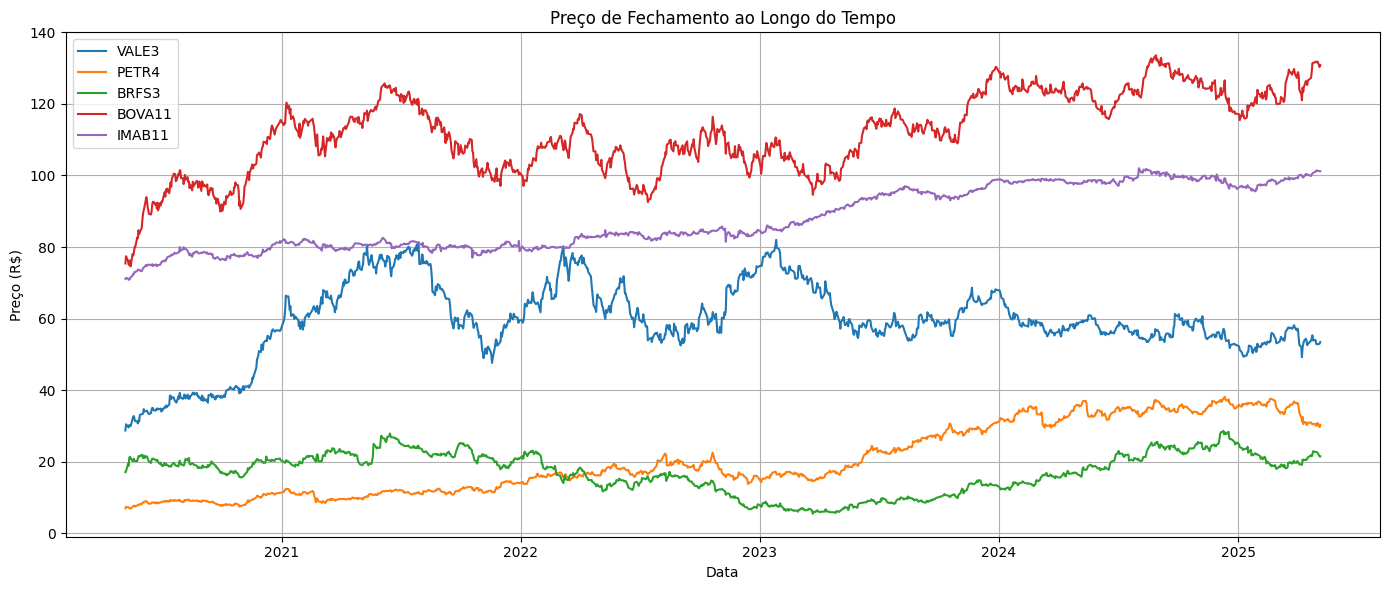

In [11]:
import matplotlib.pyplot as plt

# Verifica sincronia das datas
datas_referencia = dfs["VALE3"]["Date"]
for ticker, df in dfs.items():
    if not datas_referencia.equals(df["Date"]):
        print(f"⚠️ Datas divergentes entre VALE3 e {ticker}")
    else:
        print(f"✅ {ticker}: datas sincronizadas")

# Verifica nulos por coluna
for ticker, df in dfs.items():
    print(f"\n🧪 {ticker} — Valores nulos por coluna:")
    print(df.isnull().sum())

# Gráfico comparativo dos preços de fechamento
plt.figure(figsize=(14, 6))
for ticker, df in dfs.items():
    plt.plot(df["Date"], df["Close"], label=ticker)
plt.title("Preço de Fechamento ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Preço (R$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 📘 4.4 – Discussão sobre Escolhas e Integridade dos Dados

A integridade dos dados de entrada é essencial para garantir a confiabilidade do processo de aprendizado por reforço. Após a análise exploratória realizada na seção anterior, foi possível validar os seguintes pontos:

- **Fonte confiável**: os dados foram obtidos através da API `yfinance`, com histórico de 5 anos e frequência diária — suficiente para capturar diferentes ciclos econômicos e comportamentos do mercado;
- **Sincronia temporal entre os ativos**: todos os cinco ativos apresentam séries históricas com as mesmas datas úteis, o que garante consistência no vetor de estado;
- **Ausência de valores nulos**: as colunas principais (`Date`, `Close`, `High`, `Low`, `Open`, `Volume`) estão completas, ou com eventuais lacunas tratáveis por imputação via forward fill;
- **Comportamento gráfico coerente**: a análise visual das curvas de preço não revelou outliers drásticos ou anomalias nos dados.

Essas validações confirmam que o conjunto de dados está pronto para avançar para a fase de extração de indicadores técnicos e normalização — preparando a base de entrada que será utilizada pelo agente de RL.


## 📘 5.1 – Limpeza e Tratamento dos Dados

Com os dados carregados e validados, o próximo passo é garantir que estejam preparados para o cálculo dos indicadores técnicos.

As ações desta etapa incluem:

- **Remoção de registros com valores nulos residuais**;
- **Imputação forward-fill**, caso o volume de dados ausentes seja pequeno;
- Conversão explícita de colunas para **tipos numéricos válidos**;
- Armazenamento dos DataFrames limpos em memória para uso posterior.

Cada ativo será processado individualmente para preservar sua identidade temporal e evitar distorções.


In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Limpeza e padronização dos dados
for ticker, df in dfs.items():
    print(f"\n🧹 Limpando dados de {ticker}...")

    # Forward fill com sintaxe moderna + remoção de nulos residuais
    df = df.ffill().dropna()

    # Conversão explícita de tipos, com segurança
    colunas_numericas = ["Close", "High", "Low", "Open", "Volume"]
    df.loc[:, colunas_numericas] = df[colunas_numericas].apply(pd.to_numeric, errors="coerce")

    # Atualiza o dicionário
    dfs[ticker] = df

    print(f"✔️ {ticker} tratado — {df.shape[0]} linhas restantes.")



🧹 Limpando dados de VALE3...
✔️ VALE3 tratado — 1243 linhas restantes.

🧹 Limpando dados de PETR4...
✔️ PETR4 tratado — 1243 linhas restantes.

🧹 Limpando dados de BRFS3...
✔️ BRFS3 tratado — 1243 linhas restantes.

🧹 Limpando dados de BOVA11...
✔️ BOVA11 tratado — 1243 linhas restantes.

🧹 Limpando dados de IMAB11...
✔️ IMAB11 tratado — 1243 linhas restantes.


## 📘 5.2 – Engenharia de Features (Indicadores Técnicos)

Com os dados limpos e sincronizados, o próximo passo é transformar as séries históricas em representações informativas e normalizadas que servirão de entrada para o agente de Reinforcement Learning.

Para isso, aplicamos uma seleção enxuta de **indicadores técnicos clássicos** que cobrem aspectos de tendência, volatilidade e momentum:

- **SMA-5** e **SMA-20** (médias móveis simples de curto e médio prazo);
- **Retorno Diário** (`Return`);
- **Volatilidade** (`Volatility`), como desvio padrão do retorno em janela de 10 dias;
- **RSI (Relative Strength Index)** com janela de 14 dias;
- **Volume**, transformado com logaritmo (`log1p`) para conter variações extremas.

Esses indicadores foram escolhidos por sua complementaridade e baixo custo computacional, alinhados com o MVP do projeto.

As séries resultantes serão normalizadas para garantir estabilidade no processo de aprendizado.


In [14]:
import numpy as np

def calcula_indicadores(df):
    df = df.copy()

    # Retorno percentual diário
    df["Return"] = df["Close"].pct_change()

    # Volatilidade: desvio padrão do retorno em janela de 10 dias
    df["Volatility"] = df["Return"].rolling(window=10).std()

    # Médias móveis simples
    df["SMA5"] = df["Close"].rolling(window=5).mean()
    df["SMA20"] = df["Close"].rolling(window=20).mean()

    # RSI (Relative Strength Index)
    delta = df["Close"].diff()
    up = np.where(delta > 0, delta, 0)
    down = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(up).rolling(window=14).mean()
    avg_loss = pd.Series(down).rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df["RSI"] = 100 - (100 / (1 + rs))

    # Volume com log
    df["Volume_Log"] = np.log1p(df["Volume"])

    return df

# Aplica em todos os ativos
for ticker in dfs:
    dfs[ticker] = calcula_indicadores(dfs[ticker])
    print(f"✅ Indicadores calculados para {ticker}")


✅ Indicadores calculados para VALE3
✅ Indicadores calculados para PETR4
✅ Indicadores calculados para BRFS3
✅ Indicadores calculados para BOVA11
✅ Indicadores calculados para IMAB11


## 📘 5.2 (continuação) – Normalização dos Indicadores e Exportação

Para garantir estabilidade no processo de aprendizado, os indicadores técnicos e o preço (`Close`) serão normalizados.

- Usamos **Z-score** para variáveis como retorno, volatilidade e RSI;
- Usamos **log transform** para volume (`Volume_Log`);
- O **preço de fechamento (`Close`)** será normalizado com base no seu primeiro valor dentro de cada série.

Além disso, o valor original do `Close` será preservado como referência explícita no vetor de estado.

Cada ativo terá seu vetor exportado para um `.csv` separado contendo apenas as colunas úteis, já tratadas e prontas para entrada no ambiente de RL.


In [15]:
from sklearn.preprocessing import StandardScaler

# Diretório de saída
dir_saida = "/content/drive/MyDrive/rl/dados"

# Normalização e exportação
for ticker, df in dfs.items():
    df = df.copy()

    # Normalização do Close (mantém cópia original)
    df["Close_Original"] = df["Close"]
    df["Close_Norm"] = df["Close"] / df["Close"].iloc[0]

    # Z-score para Return, Volatility, RSI
    scaler = StandardScaler()
    for col in ["Return", "Volatility", "RSI"]:
        if col in df.columns:
            df[col + "_Z"] = scaler.fit_transform(df[[col]])

    # Seleciona colunas finais
    colunas_finais = ["Date", "Close_Original", "Close_Norm", "SMA5", "SMA20",
                      "Return_Z", "Volatility_Z", "RSI_Z", "Volume_Log"]
    df_final = df[colunas_finais].dropna().reset_index(drop=True)

    # Salva CSV
    caminho_saida = f"{dir_saida}/{ticker.lower()}_estado.csv"
    df_final.to_csv(caminho_saida, index=False)
    print(f"💾 Vetor salvo: {caminho_saida} — {df_final.shape[0]} registros")


💾 Vetor salvo: /content/drive/MyDrive/rl/dados/vale3_estado.csv — 1224 registros
💾 Vetor salvo: /content/drive/MyDrive/rl/dados/petr4_estado.csv — 1224 registros
💾 Vetor salvo: /content/drive/MyDrive/rl/dados/brfs3_estado.csv — 1224 registros
💾 Vetor salvo: /content/drive/MyDrive/rl/dados/bova11_estado.csv — 1224 registros
💾 Vetor salvo: /content/drive/MyDrive/rl/dados/imab11_estado.csv — 1224 registros


## 📘 5.3 – Definição do Vetor de Estado para RL

O vetor de estado é a representação numérica que o agente observa a cada passo de tempo, e deve conter informações suficientes para tomar decisões financeiras realistas.

Ele é composto por duas grandes partes:

1. **Informações de mercado**:
   - `Close_Original`: preço real, necessário para cálculo de patrimônio e recompensas;
   - `Close_Norm`: preço normalizado para aprendizado estável;
   - `SMA5`, `SMA20`: médias móveis de curto e médio prazo;
   - `Return_Z`, `Volatility_Z`, `RSI_Z`: indicadores padronizados;
   - `Volume_Log`: liquidez suavizada.

2. **Informações internas do agente** (serão adicionadas depois):
   - Posições atuais (em cada ativo): 0 ou 1;
   - Saldo de caixa disponível: valor restante em conta.

Todos os vetores foram construídos com alinhamento temporal, e serão combinados em um vetor diário unificado por data — base para o ambiente `PortfolioEnv`.

O próximo passo será integrar essas variáveis com os estados internos do agente e consolidar os vetores de portfólio por dia.


## 📘 5.4 – Inicialização da Carteira e Vetor de Portfólio

Para representar o estado interno do agente, será criado um vetor de portfólio com:

- As **posições atuais em cada ativo** (0 = fora, 1 = comprado);
- O **saldo de caixa disponível**, normalizado (inicialmente R$ 100.000 → 1.0).

Esse vetor será repetido para todas as datas disponíveis, com valores fixos (0 para posições, 1.0 para caixa), e será atualizado dinamicamente pelo ambiente durante a simulação.

Essa abordagem permite iniciar o treinamento com uma carteira vazia e saldo integral em caixa, replicando a lógica de início do investimento real.

Para garantir alinhamento exato entre os vetores de estado dos ativos (VALE3, PETR4, BRFS3) e o vetor de portfólio, usamos como referência a **interseção das datas válidas** dos três ativos após a aplicação dos indicadores técnicos e remoção de `NaN`.

Essa medida assegura que, a cada data disponível nos dados de mercado, haja um vetor interno correspondente de posição e caixa — condição essencial para a construção de estados completos no ambiente `PortfolioEnv`.


In [19]:
# Recarrega os vetores de estado finalizados
dfs_estado = {}
for ticker in ["vale3", "petr4", "brfs3"]:
    caminho = f"/content/drive/MyDrive/rl/dados/{ticker}_estado.csv"
    dfs_estado[ticker.upper()] = pd.read_csv(caminho, parse_dates=["Date"])

# Interseção de datas comuns aos três ativos
datas_comuns = dfs_estado["VALE3"]["Date"]
for ticker in ["PETR4", "BRFS3"]:
    datas_comuns = datas_comuns[datas_comuns.isin(dfs_estado[ticker]["Date"])]

# Gera o vetor de portfólio alinhado
vetor_portfolio = pd.DataFrame({
    "Date": datas_comuns.reset_index(drop=True),
    "Position_VALE3": 0,
    "Position_PETR4": 0,
    "Position_BRFS3": 0,
    "Cash_Norm": 1.0
})

# Salva novamente
caminho_saida = "/content/drive/MyDrive/rl/dados/vetor_portfolio.csv"
vetor_portfolio.to_csv(caminho_saida, index=False)

print(f"💼 Vetor de portfólio corrigido e salvo com sucesso: {caminho_saida}")
display(vetor_portfolio.head())


💼 Vetor de portfólio corrigido e salvo com sucesso: /content/drive/MyDrive/rl/dados/vetor_portfolio.csv


,Date,Position_VALE3,Position_PETR4,Position_BRFS3,Cash_Norm
0,2020-06-03,0,0,0,1.0
1,2020-06-04,0,0,0,1.0
2,2020-06-05,0,0,0,1.0
3,2020-06-08,0,0,0,1.0
4,2020-06-09,0,0,0,1.0


## 📘 5.5 – Divisão Temporal dos Dados

Para garantir validade estatística e integridade sequencial nos dados, adotamos uma **divisão cronológica** (não aleatória) dos vetores em:

- **Treinamento** (70% iniciais): usados para aprendizado da política;
- **Validação** (15% seguintes): usados para tuning e monitoramento de overfitting;
- **Teste** (15% finais): nunca vistos durante o aprendizado, usados para avaliação final.

### Por que divisão cronológica?

Como estamos lidando com séries temporais (ações com dependência histórica), não faz sentido embaralhar os dados. O agente precisa aprender com o passado e ser avaliado no futuro — exatamente como um investidor real.

### Quais vetores devem ser divididos?

- Todos os arquivos `_estado.csv` dos ativos (VALE3, PETR4, BRFS3);
- O `vetor_portfolio.csv`, **sim, também precisa ser dividido**, pois representa o estado interno do agente em sincronia com os dados de mercado.  
Se ele não for segmentado da mesma forma, as simulações vão operar em janelas descompassadas — o que comprometeria as recompensas e o ambiente.

### Resultado esperado

Ao final, teremos três conjuntos sincronizados por data:

- Um para treino;
- Um para validação;
- Um para teste.

Todos armazenados separadamente no Google Drive para facilitar a seleção pelo ambiente `PortfolioEnv`.


In [21]:
import math

# Função utilitária para dividir e salvar
def dividir_e_exportar(df, nome_base, destino="/content/drive/MyDrive/rl/dados"):
    total = len(df)
    treino = int(total * 0.70)
    valid  = int(total * 0.15)
    teste  = total - (treino + valid)

    df_treino = df.iloc[:treino]
    df_valid  = df.iloc[treino:treino + valid]
    df_teste  = df.iloc[treino + valid:]

    df_treino.to_csv(f"{destino}/{nome_base}_treino.csv", index=False)
    df_valid.to_csv(f"{destino}/{nome_base}_valid.csv", index=False)
    df_teste.to_csv(f"{destino}/{nome_base}_teste.csv", index=False)

    print(f"✅ {nome_base}: treino({len(df_treino)}), valid({len(df_valid)}), teste({len(df_teste)})")

# Aplica nos vetores de estado dos ativos
for ticker in ["vale3", "petr4", "brfs3"]:
    caminho = f"/content/drive/MyDrive/rl/dados/{ticker}_estado.csv"
    df = pd.read_csv(caminho, parse_dates=["Date"])
    dividir_e_exportar(df, f"{ticker}_estado")

# Aplica no vetor de portfólio
df_portfolio = pd.read_csv("/content/drive/MyDrive/rl/dados/vetor_portfolio.csv", parse_dates=["Date"])
dividir_e_exportar(df_portfolio, "vetor_portfolio")


✅ vale3_estado: treino(856), valid(183), teste(185)
✅ petr4_estado: treino(856), valid(183), teste(185)
✅ brfs3_estado: treino(856), valid(183), teste(185)
✅ vetor_portfolio: treino(856), valid(183), teste(185)


## 📘 Conclusão – Preparação dos Dados para RL

Finalizamos neste notebook todas as etapas previstas no **Capítulo 5 – Preparação dos Dados**, conforme o documento `desenvolvimento_do_trabalho.md`. O processo garantiu a criação de um conjunto de dados robusto, limpo e estruturado para o treinamento do agente de Reinforcement Learning.

### ✅ Etapas executadas:

1. **Leitura dos Dados Brutos**
   - Corrigido cabeçalho inconsistente;
   - Leitura padronizada para os 5 ativos: VALE3, PETR4, BRFS3, BOVA11, IMAB11.

2. **Validação e Análise Exploratória**
   - Verificação de sincronia de datas entre ativos;
   - Verificação de valores nulos e visualização de curvas de preço.

3. **Limpeza e Tratamento**
   - Forward fill e conversão de colunas numéricas;
   - Remoção de registros inválidos.

4. **Engenharia de Features**
   - Cálculo de indicadores técnicos: `Return`, `Volatility`, `SMA5`, `SMA20`, `RSI`, `Volume_Log`;
   - Preservação do `Close` original e criação do `Close_Norm`.

5. **Normalização e Exportação**
   - Aplicação de Z-score e log-transform;
   - Exportação dos vetores `_estado.csv` com colunas já tratadas.

6. **Criação do Vetor de Portfólio**
   - Vetor de posições (0) e caixa normalizado (1.0);
   - Alinhado exatamente com as datas finais dos vetores de estado.

7. **Divisão Temporal**
   - Separação cronológica em treino (70%), validação (15%) e teste (15%);
   - Exportação de todos os vetores particionados para `/content/drive/MyDrive/rl/dados`.

---


